In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from src.functionalization import *

In [2]:
plt.style.use('ggplot')

In [3]:
raw = pd.read_csv('data/NeighborhoodFoodRetail.csv')

In [4]:
raw['geoid-tract'] = raw['GEOID10'].astype(str).str[:-1].astype(np.int64)

In [5]:
#Below csv is a way to join census block groups with census tract information.  
#Did not end up using because only average of 3 block groups per tract
'''
number of unique block groups: 1336
number of tracts: 384

'''

census = pd.read_csv('data/Philadelphia_Census_Tracts_2010_201302.csv')

## Initial Look

In [6]:
raw.columns

Index(['OBJECTID', 'GEOID10', 'NON_RESIDENTIAL', 'TOTAL_LPSS', 'LPSS_PER1000',
       'TOTAL_HPSS', 'HPSS_PER1000', 'PCT_HPSS', 'HPSS_ACCESS',
       'SUPERMARKET_ACCESS', 'PCT_VEHICLE_AVAILABILITY', 'TOTAL_RESTAURANTS',
       'PCT_POVERTY', 'HIGH_POVERTY', 'Shape__Area', 'Shape__Length',
       'geoid-tract'],
      dtype='object')

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OBJECTID                  1336 non-null   int64  
 1   GEOID10                   1336 non-null   int64  
 2   NON_RESIDENTIAL           1336 non-null   object 
 3   TOTAL_LPSS                1325 non-null   float64
 4   LPSS_PER1000              1325 non-null   float64
 5   TOTAL_HPSS                1325 non-null   float64
 6   HPSS_PER1000              1325 non-null   float64
 7   PCT_HPSS                  1325 non-null   float64
 8   HPSS_ACCESS               1325 non-null   object 
 9   SUPERMARKET_ACCESS        1325 non-null   object 
 10  PCT_VEHICLE_AVAILABILITY  1326 non-null   float64
 11  TOTAL_RESTAURANTS         1336 non-null   int64  
 12  PCT_POVERTY               1327 non-null   float64
 13  HIGH_POVERTY              1327 non-null   object 
 14  Shape__A

In [8]:
#adjust column names, drop objectid (use GEOID10 as unique identifier)

raw.columns = ['id', 'geoid', 'non_res', 'tot_lpss', 'lpss_per_1000',
       'tot_hpss', 'hpss_per_1000', 'pct_hpss', 'hpss_access',
       'sprmkt_access', 'pct_vehicle_avail', 'tot_restaurants',
       'pct_poverty', 'high_poverty', 'area', 'length', 'geoid-tract']

raw.drop('id', axis = 1, inplace = True)

raw.columns

Index(['geoid', 'non_res', 'tot_lpss', 'lpss_per_1000', 'tot_hpss',
       'hpss_per_1000', 'pct_hpss', 'hpss_access', 'sprmkt_access',
       'pct_vehicle_avail', 'tot_restaurants', 'pct_poverty', 'high_poverty',
       'area', 'length', 'geoid-tract'],
      dtype='object')

In [9]:
raw.head()

,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
0,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,275942.097656,3260.316044,42101010800
1,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,176880.882812,1736.152373,42101010800
2,421010109002,No,7.0,17.114914,0.50,1.222494,6.666667,Low Access,No,37.356322,1,57.212714,Yes,74520.027344,1211.853466,42101010900
3,421010110002,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,Yes,52.824859,0,19.480519,No,185771.992188,2057.362419,42101011000
4,421010110001,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,Yes,70.408163,1,52.134146,Yes,242486.906250,4166.159591,42101011000


## Handling Null Data:

* 11 Null values in columns: 'tot_lpss', 'lpss_per_1000', 'tot_hpss',
       'hpss_per_1000', 'pct_hpss', 'hpss_access', 'sprmkt_access'
       
* 10 Null values in columns: 'pct_vehicle_avail'
* 9 Null values in columns: 'pct_poverty'

In [10]:
# Looking at 11 nulls for **SS categories: All Non-residential 

print(f'Number of Null Rows: {len(raw[raw["tot_lpss"].isna()])}')

raw[raw['tot_lpss'].isna()]

Number of Null Rows: 11


,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
57,421010050001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,1.395457e+07,19077.397532,42101005000
190,421019805001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,7.091363e+05,3497.167229,42101980500
210,421019809001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,3.497850e+07,40155.296102,42101980900
212,421019807001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,1.278324e+07,19410.087844,42101980700
213,421019801001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.452830,3,13.265306,No,1.006789e+07,39471.537984,42101980100
283,421019800001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.604396,36,4.945055,No,1.780644e+07,27702.726031,42101980000
369,421019802001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.956522,1,11.455108,No,9.214561e+06,34834.687659,42101980200
376,421019806001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2.189288e+06,8458.313890,42101980600
384,421019808001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3.701706e+06,16464.480283,42101980800
701,421019803001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,1.303118e+07,14608.573156,42101980300


In [11]:
# Looking at nulls for pct_poverty:

print(f'Number of Null Rows: {len(raw[raw["pct_poverty"].isna()])}')

raw[raw['pct_poverty'].isna()]

Number of Null Rows: 9


,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
57,421010050001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,1.395457e+07,19077.397532,42101005000
183,421010369001,No,27.0,212.598425,8.0,62.992126,22.857143,Moderate or High Access,Yes,NaN,36,NaN,NaN,8.377759e+05,5412.929429,42101036900
190,421019805001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,7.091363e+05,3497.167229,42101980500
210,421019809001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,3.497850e+07,40155.296102,42101980900
212,421019807001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,1.278324e+07,19410.087844,42101980700
376,421019806001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2.189288e+06,8458.313890,42101980600
384,421019808001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3.701706e+06,16464.480283,42101980800
701,421019803001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,1.303118e+07,14608.573156,42101980300
1019,421019804001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,5.056550e+06,13040.204472,42101980400


In [12]:
# Looking at nulls for pct_vehicle_avail:

print(f'Number of Null Rows: {len(raw[raw["pct_vehicle_avail"].isna()])}')

raw[raw['pct_vehicle_avail'].isna()]

Number of Null Rows: 10


,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
57,421010050001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,1.395457e+07,19077.397532,42101005000
183,421010369001,No,27.0,212.598425,8.0,62.992126,22.857143,Moderate or High Access,Yes,NaN,36,NaN,NaN,8.377759e+05,5412.929429,42101036900
190,421019805001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,7.091363e+05,3497.167229,42101980500
210,421019809001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,3.497850e+07,40155.296102,42101980900
212,421019807001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,1.278324e+07,19410.087844,42101980700
376,421019806001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2.189288e+06,8458.313890,42101980600
384,421019808001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3.701706e+06,16464.480283,42101980800
701,421019803001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,1.303118e+07,14608.573156,42101980300
829,421019891001,No,5.0,1.971609,0.0,0.000000,0.000000,No Access,No,NaN,3,92.45283,Yes,7.014906e+06,12283.283540,42101989100
1019,421019804001,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,5.056550e+06,13040.204472,42101980400


Observation: most of null values are shared across columns and are non-residential.
They will not add insight to our analysis.  These 13 total rows will be dropped from the initial raw dataset.  
New dataframe will be called "df".

In [13]:
df = raw.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1335
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geoid              1323 non-null   int64  
 1   non_res            1323 non-null   object 
 2   tot_lpss           1323 non-null   float64
 3   lpss_per_1000      1323 non-null   float64
 4   tot_hpss           1323 non-null   float64
 5   hpss_per_1000      1323 non-null   float64
 6   pct_hpss           1323 non-null   float64
 7   hpss_access        1323 non-null   object 
 8   sprmkt_access      1323 non-null   object 
 9   pct_vehicle_avail  1323 non-null   float64
 10  tot_restaurants    1323 non-null   int64  
 11  pct_poverty        1323 non-null   float64
 12  high_poverty       1323 non-null   object 
 13  area               1323 non-null   float64
 14  length             1323 non-null   float64
 15  geoid-tract        1323 non-null   int64  
dtypes: float64(9), int64(3),

In [14]:
df.describe()

,geoid,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,pct_vehicle_avail,tot_restaurants,pct_poverty,area,length,geoid-tract
count,1.323000e+03,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000,1.323000e+03
mean,4.210102e+11,29.681784,30.972374,3.787415,3.775322,11.820571,67.996425,4.738473,26.508755,3.765455e+05,2569.745043,4.210102e+10
std,1.133177e+05,19.912270,25.271168,4.543413,4.675435,9.599723,20.016295,11.137889,18.753629,5.860417e+05,1567.624466,1.133177e+04
min,4.210100e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.854482e+04,714.420557,4.210100e+10
25%,4.210101e+11,16.000000,13.070168,1.250000,1.239927,5.555556,53.694266,1.000000,11.043445,1.385243e+05,1617.945640,4.210101e+10
50%,4.210102e+11,27.000000,24.469821,2.750000,2.557981,9.677419,69.856459,2.000000,22.909091,2.119770e+05,2071.517104,4.210102e+10
75%,4.210103e+11,39.000000,41.753900,4.250000,4.505858,15.789474,84.330495,5.000000,39.300387,3.811675e+05,2974.440984,4.210103e+10
max,4.210104e+11,148.000000,224.615385,32.000000,47.339593,80.952381,100.000000,174.000000,88.194444,8.317655e+06,15886.036994,4.210104e+10


## Supermarket Access: Is there an Impact? 

Split dataframe based on sprmrkt_access (Yes or No)

In [15]:
sprmkt_access = df[df['sprmkt_access']=='Yes']
len(sprmkt_access)

1051

In [16]:
no_sprmkt_access = df[df['sprmkt_access']=='No']
len(no_sprmkt_access)

272

In [17]:
print(f"% Poverty WITH Super Market Access:  \n Mean: {sprmkt_access['pct_poverty'].mean()}  \n Standard Deviation: {sprmkt_access['pct_poverty'].std()}")

print(f"\n \n % Poverty WITHOUT Super Market Access:  \n Mean: {no_sprmkt_access['pct_poverty'].mean()}  \n Standard Deviation: {no_sprmkt_access['pct_poverty'].std()}")

% Poverty WITH Super Market Access:  
 Mean: 26.90533879603233  
 Standard Deviation: 18.924319713806238

 
 % Poverty WITHOUT Super Market Access:  
 Mean: 24.976368040845596  
 Standard Deviation: 18.030845828927923


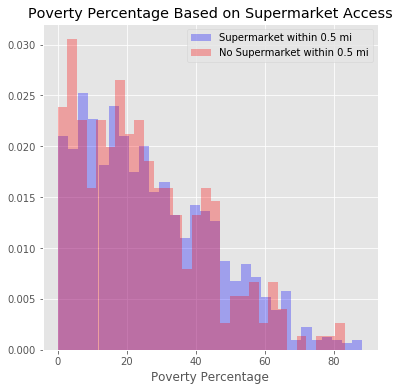

In [20]:
fig, ax = plt.subplots(figsize = (6,6))
data = [sprmkt_access['pct_poverty'], no_sprmkt_access['pct_poverty']]
labels = ['Supermarket within 0.5 mi', 'No Supermarket within 0.5 mi']
colors = ['blue', 'red']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'Poverty Percentage', title = 'Poverty Percentage Based on Supermarket Access')

### Closer Look: Poverty Percentage

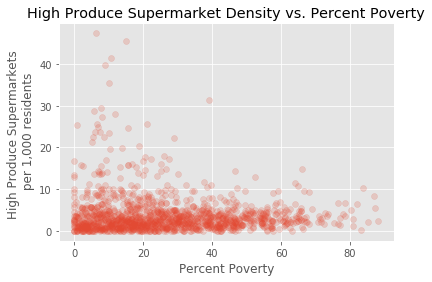

In [41]:
fig, ax = plt.subplots()
ax.scatter(df['pct_poverty'], df['hpss_per_1000'], alpha = 0.2)
ax.set_xlabel('Percent Poverty')
ax.set_ylabel('High Produce Supermarkets \n per 1,000 residents')
ax.set_title('High Produce Supermarket Density vs. Percent Poverty');

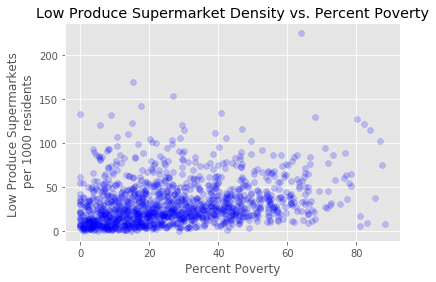

In [43]:
fig, ax = plt.subplots()
ax.scatter(df['pct_poverty'], df['lpss_per_1000'], alpha = 0.2, color = 'blue')
ax.set_xlabel('Percent Poverty')
ax.set_ylabel('Low Produce Supermarkets \n per 1000 residents')
ax.set_title('Low Produce Supermarket Density vs. Percent Poverty');


### Vehicle Access based on Supermarket Access

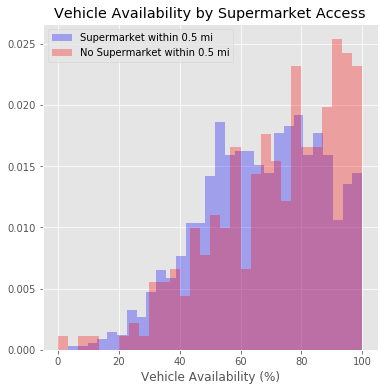

In [22]:
fig, ax = plt.subplots(figsize = (6,6))
data = [sprmkt_access['pct_vehicle_avail'], no_sprmkt_access['pct_vehicle_avail']]
labels = ['Supermarket within 0.5 mi', 'No Supermarket within 0.5 mi']
colors = ['blue', 'red']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'Vehicle Availability (%)', title = 'Vehicle Availability by Supermarket Access')

Perform Welche's t-test: 2 independent samples, equal variance = False

Ho: the mean vehicle availability for areas with supermarket access is the 
same as the mean vehicle availability for areas without supermarket access

Ha: the mean vehicle availability for areas with supermarket access is 
different than the mean vehicle availability for areas without supermarket access

significance level (alpha) = 0.05

In [23]:
perform_two_samp_ttest(sprmkt_access['pct_vehicle_avail'], no_sprmkt_access['pct_vehicle_avail'])

'p-value = 0.00022145585274292593: Reject the Null Hypothesis'

In [36]:
print(f"Vehicle Availablility WITH Super Market Access:  \n Mean: {np.mean(sprmkt_access['pct_vehicle_avail'])}  \n Standard Deviation: {np.std(sprmkt_access['pct_vehicle_avail'], ddof = 1)}")

print(f"\n \n Vehicle Availablility WITHOUT Super Market Access:  \n Mean: {no_sprmkt_access['pct_vehicle_avail'].mean()}  \n Standard Deviation: {np.std(no_sprmkt_access['pct_vehicle_avail'], ddof = 1)}")

Vehicle Availablility WITH Super Market Access:  
 Mean: 66.93586329526163  
 Standard Deviation: 19.761411173992382

 
 Vehicle Availablility WITHOUT Super Market Access:  
 Mean: 72.09440593992645  
 Standard Deviation: 20.498673409248337


### Look at Poverty Classification
* High poverty: areas where >20% of residents are below the federal poverty line

In [ ]:
##########TODO look at poverty buckets

In [37]:
#create data frames based on poverty classification

high_pov = df[df['high_poverty']=='Yes']
not_high_pov = df[df['high_poverty']=='No']

##### High Produce Supply Stores per 1,000 Residents based on Poverty Classification

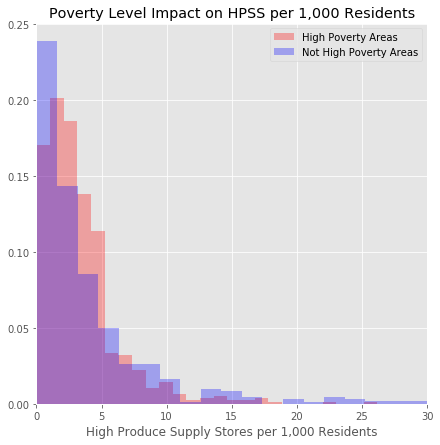

In [58]:
fig, ax = plt.subplots(figsize = (7,7))

data = [high_pov['hpss_per_1000'], not_high_pov['hpss_per_1000']]
labels = ['High Poverty Areas', 'Not High Poverty Areas']
colors = ['red', 'blue']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'High Produce Supply Stores per 1,000 Residents', title = 'Poverty Level Impact on HPSS per 1,000 Residents')
ax.set_xlim(0, 30);

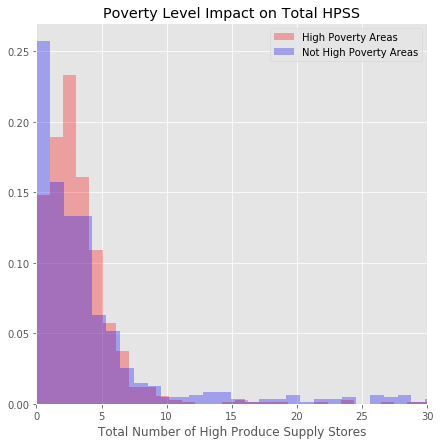

In [57]:
fig, ax = plt.subplots(figsize = (7,7))

data = [high_pov['tot_hpss'], not_high_pov['tot_hpss']]
labels = ['High Poverty Areas', 'Not High Poverty Areas']
colors = ['red', 'blue']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'Total Number of High Produce Supply Stores', title = 'Poverty Level Impact on Total HPSS')
ax.set_xlim(0, 30);

In [43]:
print(f"High Poverty Areas: HPSS per 1,000 Residents  \n Mean: {high_pov['hpss_per_1000'].mean()}  \n Standard Deviation: {high_pov['hpss_per_1000'].std(ddof = 1)} \n Median: {high_pov['hpss_per_1000'].median()}")
print(f"\n \n Not High Poverty Areas: HPSS per 1,000 Residents  \n Mean: {not_high_pov['hpss_per_1000'].mean()}  \n Standard Deviation: {not_high_pov['hpss_per_1000'].std(ddof = 1)} \n Median: {not_high_pov['hpss_per_1000'].median()}")


High Poverty Areas: HPSS per 1,000 Residents  
 Mean: 3.3916691824357206  
 Standard Deviation: 3.1997347866450787 
 Median: 2.68048606

 
 Not High Poverty Areas: HPSS per 1,000 Residents  
 Mean: 4.260799822654104  
 Standard Deviation: 6.015450479604703 
 Median: 2.3598893949999997


Perform Welche's t-test: 2 independent samples, equal variance = False

Ho: the mean # high produce supply stores per 1,000 residents for high poverty areas is the same as
the mean # high produce supply stores per 1,000 residents for ares not classified as high poverty

Ha: the mean # high produce supply stores per 1,000 residents for high poverty areas is different
the mean # high produce supply stores per 1,000 residents for ares not classified as high poverty

significance level (alpha) = 0.05

In [44]:
perform_two_samp_ttest(high_pov['hpss_per_1000'], not_high_pov['hpss_per_1000'])

'p-value = 0.001653773426161172: Reject the Null Hypothesis'

### ^^^^placeholder - Would like to test for practical significance...

##### Low Produce Supply Stores per 1,000 Residents based on Poverty Classification

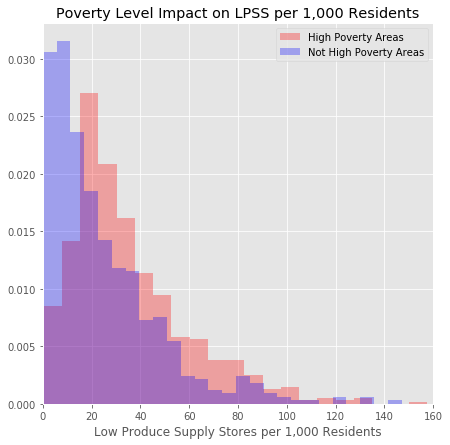

In [56]:
fig, ax = plt.subplots(figsize = (7,7))

data = [high_pov['lpss_per_1000'], not_high_pov['lpss_per_1000']]
labels = ['High Poverty Areas', 'Not High Poverty Areas']
colors = ['red', 'blue']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'Low Produce Supply Stores per 1,000 Residents', title = 'Poverty Level Impact on LPSS per 1,000 Residents')
ax.set_xlim(0, 160);

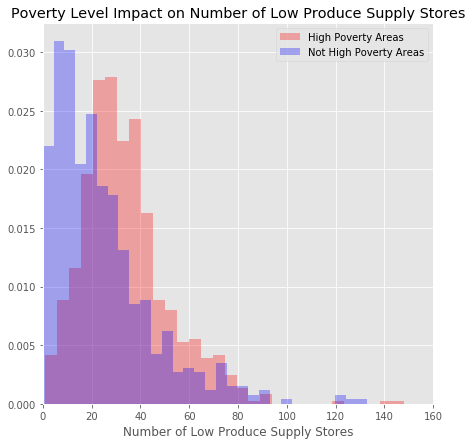

In [55]:
fig, ax = plt.subplots(figsize = (7,7))

data = [high_pov['tot_lpss'], not_high_pov['tot_lpss']]
labels = ['High Poverty Areas', 'Not High Poverty Areas']
colors = ['red', 'blue']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'Number of Low Produce Supply Stores', title = 'Poverty Level Impact on Number of Low Produce Supply Stores')
ax.set_xlim(0, 160);

In [49]:
print(f"High Poverty Areas: LPSS per 1,000 Residents  \n Mean: {high_pov['lpss_per_1000'].mean()}  \n Standard Deviation: {high_pov['lpss_per_1000'].std(ddof = 1)}")
print(f"\n \n Not High Poverty Areas: LPSS per 1,000 Residents  \n Mean: {not_high_pov['lpss_per_1000'].mean()}  \n Standard Deviation: {not_high_pov['lpss_per_1000'].std(ddof = 1)}")


High Poverty Areas: LPSS per 1,000 Residents  
 Mean: 35.69629936443842  
 Standard Deviation: 25.303419912292952

 
 Not High Poverty Areas: LPSS per 1,000 Residents  
 Mean: 24.99466610030821  
 Standard Deviation: 23.94956353088885


Perform Welche's t-test: 2 independent samples, equal variance = False

Ho: the mean # low produce supply stores per 1,000 residents for high poverty areas is the same as the mean # low produce supply stores per 1,000 residents for ares not classified as high poverty

Ha: the mean # low produce supply stores per 1,000 residents for high poverty areas is different the mean # low produce supply stores per 1,000 residents for ares not classified as high poverty

significance level (alpha) = 0.05

In [50]:
perform_two_samp_ttest(high_pov['lpss_per_1000'], not_high_pov['lpss_per_1000'])

'p-value = 7.445849586992817e-15: Reject the Null Hypothesis'

#### HPSS Percentage based on Poverty Classification

* Percent HPSS = HPSS / (HPSS + LPSS)

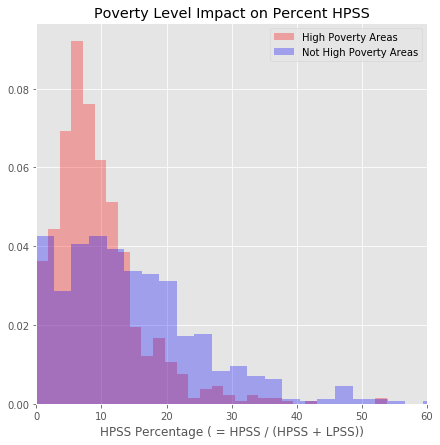

In [54]:
fig, ax = plt.subplots(figsize = (7,7))

data = [high_pov['pct_hpss'], not_high_pov['pct_hpss']]
labels = ['High Poverty Areas', 'Not High Poverty Areas']
colors = ['red', 'blue']

#from functionalization.py
overlay_histograms(ax, data, labels, colors, xlabel = 'HPSS Percentage ( = HPSS / (HPSS + LPSS))', title = 'Poverty Level Impact on Percent HPSS')
ax.set_xlim(0, 60);

Perform Welche's t-test: 2 independent samples, equal variance = False

Ho: the mean %HPSS for high poverty areas is the same as the mean %HPSS for ares not classified as high poverty

Ha: the mean # high produce supply stores per 1,000 residents for high poverty areas is different the mean # high produce supply stores per 1,000 residents for ares not classified as high poverty

significance level (alpha) = 0.05

In [61]:
#do by handassume unequalvariance

high_pov_pct_hpss_mean = high_pov['pct_hpss'].mean()
high_pov_pct_hpss_var  = high_pov['pct_hpss'].var()
high_pov_n = len(high_pov)
not_pov_pct_hpss_mean  = not_high_pov['pct_hpss'].mean()
not_pov_pct_hpss_var  = not_high_pov['pct_hpss'].var()
not_pov_n = len(not_high_pov)

tstat = (not_pov_pct_hpss_mean - high_pov_pct_hpss_mean) / np.sqrt(high_pov_pct_hpss_var/high_pov_n + not_pov_pct_hpss_var/not_pov_n)
tstat

10.109509054188702

In [62]:
perform_two_samp_ttest(high_pov['pct_hpss'], not_high_pov['pct_hpss'])

'p-value = 7.904280256859714e-23: Reject the Null Hypothesis'

In [68]:
#summary stats for %hpss based on poverty classification

print(f"High Poverty Areas: HPSS Percentage  \n Mean: {high_pov['pct_hpss'].mean()}  \n Standard Deviation: {high_pov['pct_hpss'].std()} \n Variance High Pov: {high_pov['pct_hpss'].var(ddof =1)}")

print(f"\n \n Not High Poverty Areas: HPSS Percentage  \n Mean: {not_high_pov['pct_hpss'].mean()}  \n Standard Deviation: {not_high_pov['pct_hpss'].std()} \n Variance Not High Pov: {not_high_pov['pct_hpss'].var()}")


High Poverty Areas: HPSS Percentage  
 Mean: 9.412744631583218  
 Standard Deviation: 6.847574515657955 
 Variance High Pov: 46.88927674748828

 
 Not High Poverty Areas: HPSS Percentage  
 Mean: 14.867461035256857  
 Standard Deviation: 11.53101311872929 
 Variance Not High Pov: 132.964263544307


In [160]:
high_pov[high_pov['pct_hpss']< 5]['pct_hpss'].sum()

441.95493901

In [172]:

def plot_empirical_data(ax, df, column):
    x = np.arange(df[column].min(), df[column].max()+1)
    y = ([df[df[column]<=xx][column].sum() for xx in x])/(df[column]).sum()
    data = np.hstack([x,y]).reshape(-1, len(x))
    ax.plot(data[0], data[1])


Try plotting cdfs next to each other: 


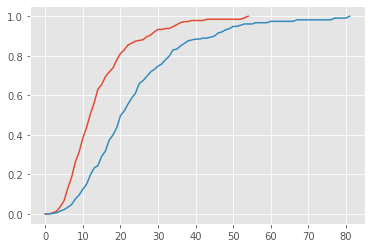

In [174]:
fig, ax = plt.subplots()

plot_empirical_data(ax, high_pov, 'pct_hpss')
plot_empirical_data(ax, not_high_pov, 'pct_hpss')

In [183]:

def plot_empirical_data(ax, df, column, label = None, color = 'blue'):
    '''
        Plots the cumulative distribution of a sample. 

            Parameters:
                    ax: axes object (matplotlib.pyplot)
                    df (pandas dataframe)
                    column (series): column within dataframe that contains the data
                    label (string): label for plot
            Returns:
                    A line plot of the sample's cumulative distribution.
    '''    
    
    x = np.arange(df[column].min(), df[column].max()+1)
    y = ([df[df[column]<=xx][column].sum() for xx in x])/(df[column]).sum()
    data = np.hstack([x,y]).reshape(-1, len(x))
    ax.plot(data[0], data[1], label = label, color = color)

def overlay_plots(ax, dfs, columns, labels, colors, title):
    '''
        Overlays two or more cumulative distribution plots on same axes object.

            Parameters:
                    ax: axes object (matplotlib.pyplot)
                    *note: arrays, colors, and labels should be parallel lists
                        dfs (list of dataframes): where data to be plotted lives
                        columns (list of column names): data from each df to plot
                        colors (list of strings): colors for each plot
                        labels (list of strings): labels for each plot
                    title (string): title for figure   
            Returns:
                    Overlayed cumulative distribution plots on same axes.
    '''
    for df, col, lab, c in zip(dfs, columns, labels, colors):
        plot_empirical_data(ax, df, col, label = lab, color = c)
    ax.set_title(title)
    ax.legend
    plt.show()

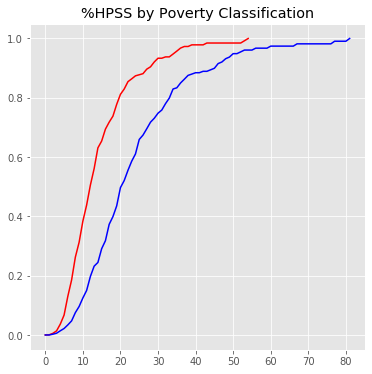

In [184]:
dfs = [high_pov, not_high_pov]
colors = ['red', 'blue']
columns = ['pct_hpss', 'pct_hpss']
labels = ['High Poverty', 'Low Poverty']
fig, ax = plt.subplots(figsize = (6,6))

overlay_plots(ax, dfs, columns, labels, colors, '%HPSS by Poverty Classification')


### Functionalization Practice


In [176]:
from src.functionalization import *

In [79]:
f.bootstrap_sampling(high_pov['tot_lpss'], 10, np.mean)

[33.47361299052774,
 34.10554803788904,
 33.88227334235453,
 33.56698240866035,
 33.63328822733423,
 33.768606224627874,
 32.097428958051424,
 33.10013531799729,
 33.12449255751015,
 33.04330175913397]

In [80]:
arrays = [high_pov['pct_hpss'], not_high_pov['pct_hpss']]
cs = ['red', 'blue']
labels = ['High Poverty Areas' , 'Not High Poverty Areas']

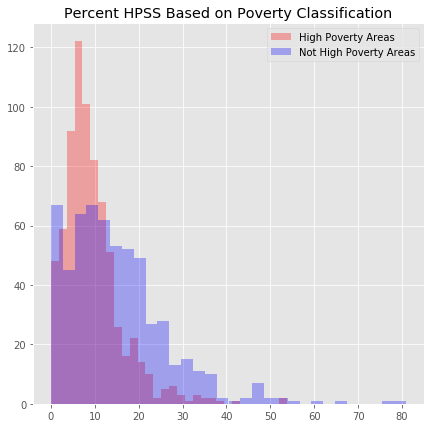

In [84]:
fig, ax = plt.subplots(figsize = (7, 7))
f.overlay_histograms(ax, arrays, labels, cs, title = 'Percent HPSS Based on Poverty Classification')

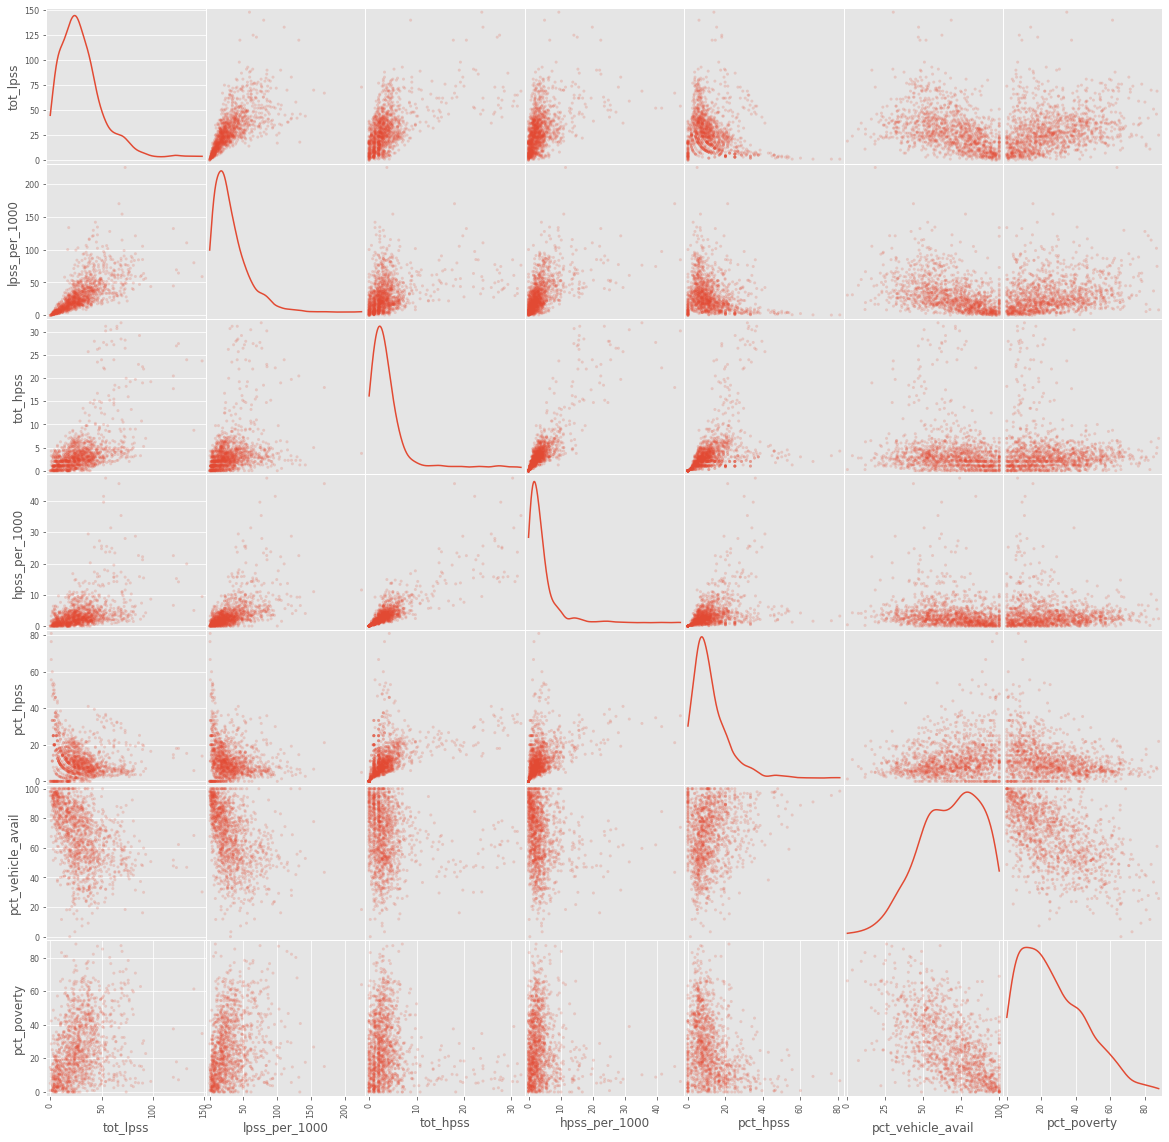

In [85]:
from pandas.plotting import scatter_matrix
scatter_cols = ['tot_lpss', 'lpss_per_1000', 'tot_hpss',
       'hpss_per_1000', 'pct_hpss',
       'pct_vehicle_avail', 'pct_poverty']
df_sub = df[scatter_cols]
scatter_matrix(df_sub, alpha = 0.2, figsize = (20, 20), diagonal = 'kde');

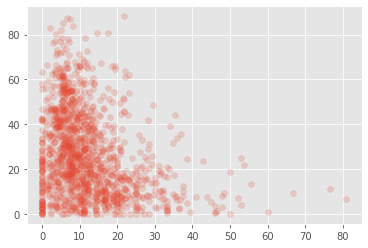

In [86]:
fig, ax = plt.subplots()
ax.scatter(df['pct_hpss'], df['pct_poverty'], alpha = 0.2);


## MLE for Poisson - modeling pct hpss based on poverty classification

Start: Model percent hpss for high poverty areas
high_pov['pct_hpss']

Poisson model
looking for maximum likelihood value of lmbda given the data
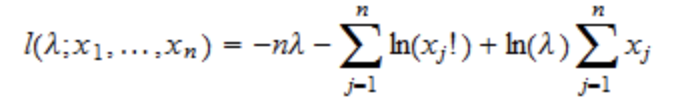



In [87]:
import math


In [88]:
def log_likelihood_poisson(data, mu):
    log_lik = -len(data)*mu
    for datum in data:
        log_lik -= math.log(math.factorial(datum)) - (np.log(mu)) * (datum)
    return log_lik

In [89]:
#test out function
lams = np.arange(1, 10)
d = [1, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4,4 ,0,7, 8, 9, 30]
for lam in lams: 
    print(f"lam: {lam}, log-likelihood: {log_likelihood_poisson(d, lam)}")


lam: 1, log-likelihood: -152.1923125658538
lam: 2, log-likelihood: -104.03647759321896
lam: 3, log-likelihood: -82.92275743105148
lam: 4, log-likelihood: -72.8806426205841
lam: 5, log-likelihood: -68.90514879704838
lam: 6, log-likelihood: -68.76692245841667
lam: 7, log-likelihood: -71.27675855465432
lam: 8, log-likelihood: -75.72480764794918
lam: 9, log-likelihood: -81.65320229624918


In [90]:
# Get approx range for mu for high pov and pct hpss --> note can't do for others 
#because non integral values....what should I do?  convert to int? 

lams = np.arange(30, 40, 0.5)
y = np.array(high_pov['lpss_per_1000']).astype(int)

for lam in lams:
    print(f"lam: {lam}, log-likelihood: {log_likelihood_poisson(y, lam)}")
 

lam: 30.0, log-likelihood: -8197.99994384215
lam: 30.5, log-likelihood: -8137.638917299022
lam: 31.0, log-likelihood: -8084.2678115074705
lam: 31.5, log-likelihood: -8037.662934451912
lam: 32.0, log-likelihood: -7997.611163138522
lam: 32.5, log-likelihood: -7963.909288084072
lam: 33.0, log-likelihood: -7936.363407850834
lam: 33.5, log-likelihood: -7914.788369108733
lam: 34.0, log-likelihood: -7899.007248180189
lam: 34.5, log-likelihood: -7888.850870433853
lam: 35.0, log-likelihood: -7884.15736425455
lam: 35.5, log-likelihood: -7884.771746653621
lam: 36.0, log-likelihood: -7890.545537858677
lam: 36.5, log-likelihood: -7901.336402485026
lam: 37.0, log-likelihood: -7917.007815122489
lam: 37.5, log-likelihood: -7937.428748364811
lam: 38.0, log-likelihood: -7962.47338150386
lam: 38.5, log-likelihood: -7992.020828263251
lam: 39.0, log-likelihood: -8025.954882100561
lam: 39.5, log-likelihood: -8064.16377773272


In [91]:
lams = np.arange(20, 30, 0.5)
y = np.array(not_high_pov['lpss_per_1000']).astype(int)

for lam in lams:
    print(f"lam: {lam}, log-likelihood: {log_likelihood_poisson(y, lam)}")
 

lam: 20.0, log-likelihood: -7388.127285411768
lam: 20.5, log-likelihood: -7326.973540144272
lam: 21.0, log-likelihood: -7274.330357460614
lam: 21.5, log-likelihood: -7229.797183499964
lam: 22.0, log-likelihood: -7193.001093850402
lam: 22.5, log-likelihood: -7163.594309454214
lam: 23.0, log-likelihood: -7141.2519855623195
lam: 23.5, log-likelihood: -7125.670238492146
lam: 24.0, log-likelihood: -7116.564380144679
lam: 24.5, log-likelihood: -7113.667334571233
lam: 25.0, log-likelihood: -7116.728214515993
lam: 25.5, log-likelihood: -7125.5110389260735
lam: 26.0, log-likelihood: -7139.793574997781
lam: 26.5, log-likelihood: -7159.366290526936
lam: 27.0, log-likelihood: -7184.03140418711
lam: 27.5, log-likelihood: -7213.602022954501
lam: 28.0, log-likelihood: -7247.901357255203
lam: 28.5, log-likelihood: -7286.762005579572
lam: 29.0, log-likelihood: -7330.025301314447
lam: 29.5, log-likelihood: -7377.540715409714


### APPROXIMATE RANGE: 
lambda between 8.5-9.5 for high poverty %hpss

lambda between 14 - 15 for not high poverty%hpss

between 33.5 - 34.5 for high pov tot_lpss

24 - 25 for not high pov tot_lpss

In [92]:
def mle_poisson(data, lams):
    log_liks = []
    y = np.array(data).astype(int)
    for lam in lams:
        log_liks.append(log_likelihood_poisson(y, lam))
    idx = np.argmax(log_liks)
    return lams[idx]
        

In [93]:
lams = np.arange(33.5, 34.5, .02)
lmbda_lpss_highpov = mle_poisson(high_pov['tot_lpss'], lams)
print(f"Lambda: High Pov (Total LPSS) {lmbda_lpss_highpov.round(3)}")

Lambda: High Pov (Total LPSS) 33.86


In [95]:
lams = np.arange(24, 25, .02)
lmbda_lpss_notpov = mle_poisson(not_high_pov['tot_lpss'], lams)
print(f"Lambda: NOT High Pov (Total LPSS) {lmbda_lpss_notpov.round(3)}%")

Lambda: NOT High Pov (Total LPSS) 24.4%


### Conclusion: poisson is not a good model for the data (see how fits)

Normal does not seem good either because drops off at 0 and has long right tail
Poisson might not be good because of the "weights" - there is error.  
Looks like beta distribution but don't know how to do that.  

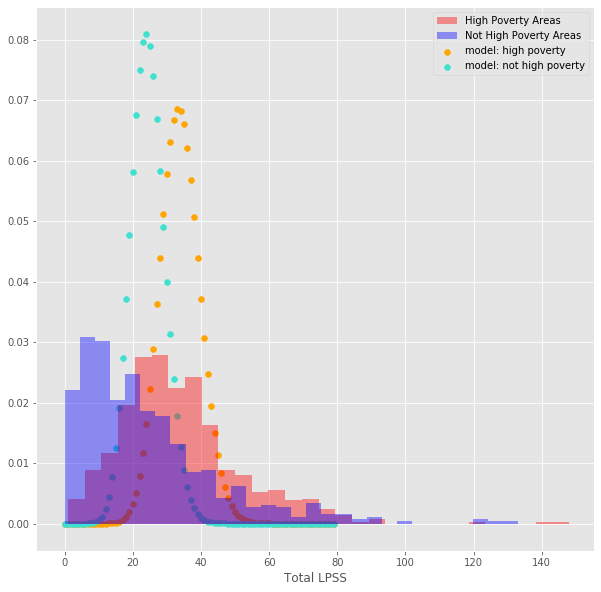

In [100]:
fig, ax = plt.subplots(figsize = (10, 10))
x = np.arange(0, 80, 1)
ax.hist(high_pov['tot_lpss'], alpha = 0.4,  color = 'red', label = 'High Poverty Areas', bins = 30, density = True)
ax.hist(not_high_pov['tot_lpss'], alpha = 0.4, color = 'blue', label = 'Not High Poverty Areas', density = True, bins = 30)
ax.scatter(x, stats.poisson(mu = lmbda_lpss_highpov).pmf(x), color = 'orange', label = 'model: high poverty')
ax.scatter(x, stats.poisson(mu = lmbda_lpss_notpov).pmf(x), color = 'turquoise', label = 'model: not high poverty')
ax.legend()
ax.set_xlabel ('Total LPSS');

Below: #LPSS per 1000 for high poverty areas

In [98]:
lams = np.arange(34.5, 36, .02)
lmbda_lpss_per_1000_highpov = mle_poisson(high_pov['lpss_per_1000'], lams)
print(f"Lambda: High Pov (LPSS per 1000) {lmbda_lpss_per_1000_highpov.round(3)}")

Lambda: High Pov (LPSS per 1000) 35.2


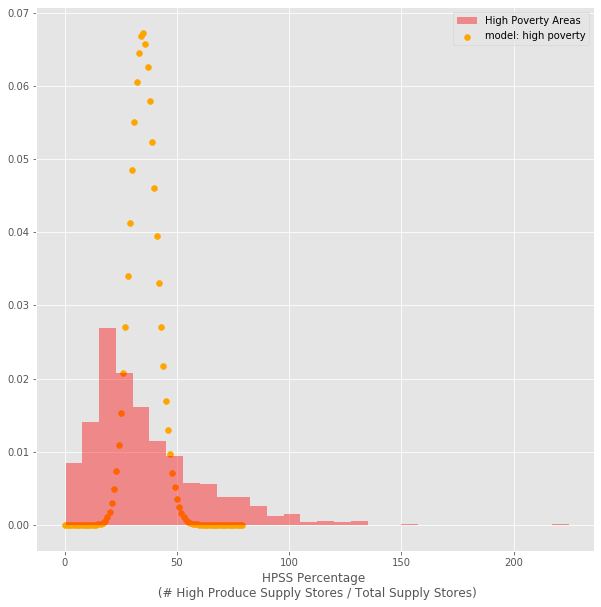

In [99]:
fig, ax = plt.subplots(figsize = (10, 10))
x = np.arange(0, 80, 1)
ax.hist(high_pov['lpss_per_1000'], alpha = 0.4,  color = 'red', label = 'High Poverty Areas', bins = 30, density = True)
# ax.hist(not_high_pov['tot_lpss'], alpha = 0.4, color = 'blue', label = 'Not High Poverty Areas', density = True, bins = 30)
ax.scatter(x, stats.poisson(mu = lmbda_lpss_per_1000_highpov).pmf(x), color = 'orange', label = 'model: high poverty')
# ax.scatter(x, stats.poisson(mu = lmbda_lpss_notpov).pmf(x), color = 'turquoise', label = 'model: not high poverty')
ax.legend()
ax.set_xlabel ('HPSS Percentage \n (# High Produce Supply Stores / Total Supply Stores)');

Explore a beta distribution


log likelihood:
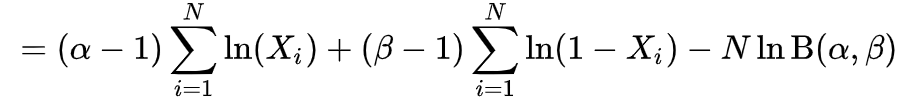

In [ ]:
import math
def log_likelihood_beta(alpha, beta, data):
    log_lik = 0
    for datum in data:
        log_lik += (alpha - 1) * (math.log(datum))
        log_lik += (beta - 1) * math.log(1 - datum)
    log_lik -= len(data) * math.log((math.factorial(alpha -1) * math.factorial(beta - 1)))
    return log_lik

In [ ]:
philly_geo= '/data/Philadelphia_Census_Tracts_2010_201302.geojson'

m = folium.Map(location=[48, -102], zoom_start=3)
39.9509° N, 75.1575° W
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [106]:
from folium.plugins import HeatMap

In [119]:
import folium.plugins

philly_geo = '/data/Philadelphia_Census_Tracts_2010_201302.geojson'

m = folium.Map(location=[39.9509, -75.1575], zoom_start=13)
m

In [122]:
folium.Choropleth(
    geo_data=philly_geo,
    name='choropleth',
    data=df,
    columns=['pct_hpss'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

IndexError: list index out of range

In [124]:
map_data = df
map_data.head()

,geoid,non_res,tot_lpss,lpss_per_1000,tot_hpss,hpss_per_1000,pct_hpss,hpss_access,sprmkt_access,pct_vehicle_avail,tot_restaurants,pct_poverty,high_poverty,area,length,geoid-tract
0,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,275942.097656,3260.316044,42101010800
1,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,176880.882812,1736.152373,42101010800
2,421010109002,No,7.0,17.114914,0.50,1.222494,6.666667,Low Access,No,37.356322,1,57.212714,Yes,74520.027344,1211.853466,42101010900
3,421010110002,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,Yes,52.824859,0,19.480519,No,185771.992188,2057.362419,42101011000
4,421010110001,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,Yes,70.408163,1,52.134146,Yes,242486.906250,4166.159591,42101011000


In [132]:
from pandas import geopd

philly = geopd.read_file(philly_geo)

ImportError: cannot import name 'geopd' from 'pandas' (/Users/jamiewessels/anaconda3/lib/python3.7/site-packages/pandas/__init__.py)

In [131]:
philly.head()

,type,features
0,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
1,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
2,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
3,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
4,FeatureCollection,"{'geometry': {'type': 'Polygon', 'coordinates'..."
